# Classification Project: Working Notebook

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model

# Data statistics & modeling
from scipy import stats
from model import map_setosa_knn, train_validate_test_split

# Data
import prepare
import env
import model
import acquire_telco
import split_telco

In [2]:
# Utilizing our py file function 'get_telco_data' to return our table in the form of a dataframe
df = acquire_telco.get_telco_data()
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [3]:
# Utilizing our py file function 'prep_telco_data' to return our dataframe tidy and clean 
df = prepare.prep_telco_data(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,0,0,1,1,0,0,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,1,0,0,0,1,0,0,0,0,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

In [5]:
# calling the function and applying it to our df
train, validate, test = split_telco.telco_split_explore(df)

In [6]:
train.shape, validate.shape, test.shape

((3937, 64), (1688, 64), (1407, 64))

In [7]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,0,0,1
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,1,0,0,1,0,0,0,0,1,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,1,1,0,0,0
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,0,0,1,0,0,0,1


In [8]:
len(train)

3937

**Note**: Total charges is showing as an object value instead of a float value. Before we can visualize this in our summary process, we will need to clean this. 

The `total_charges` column contains whitespace characters. Lets see what those are connected to:

It looks like customers with zero tenure have no total charges, and this is being represented by the whitespace character. Dropping these observations for now.

In [9]:
# View numeric summary statistics
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,contract_type_id.1,payment_type_id.1,internet_service_type_id.1,gender_encoded,partner_encoded,dependents_encoded,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,1.693167,2.346203,1.877826,0.498095,0.485141,0.302769,...,0.437389,0.220218,0.218948,0.227330,0.327407,0.226314,0.250445,0.234696,0.052324,0.462535
std,0.367845,24.709604,30.294804,2284.984394,0.836075,1.155924,0.740151,0.500060,0.499843,0.459514,...,0.496127,0.414447,0.413586,0.419161,0.469327,0.418498,0.433324,0.423863,0.222708,0.498658
min,0.000000,1.000000,18.250000,18.850000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.650000,8594.400000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


New features: Most of these are garbage and have multiple issues with keeping them - think critically about whether any of these should be used (do they actually supply new information not already represented by the existing fields?) and if they need to be one-hot encoded if kept. 

## Feature Engineering

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

# Exploratory Analysis

In [11]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,0,0,1,1,0,0,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,1,0,0,0,1,0,0,0,0,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,1,0,0


In [12]:
df['m2m'].value_counts()

1    3875
0    3157
Name: m2m, dtype: int64

In [13]:
df['e_check'].value_counts()

0    4667
1    2365
Name: e_check, dtype: int64

In [14]:
df.monthly_charges.mean()

64.7982081911263

In [15]:
df.no_pod.value_counts()

0    3752
1    3280
Name: no_pod, dtype: int64

In [16]:
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

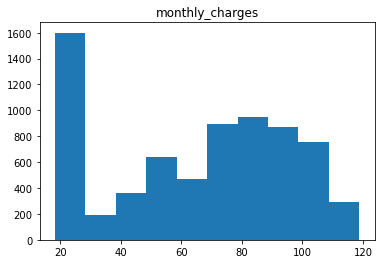

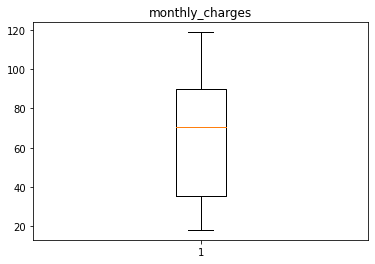

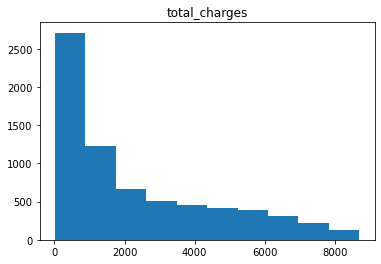

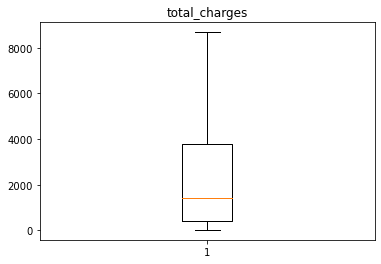

In [17]:
# Plot numeric columns
num_cols = df.columns[[df[col].dtype == 'float64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Text(0.5, 0, 'churn')

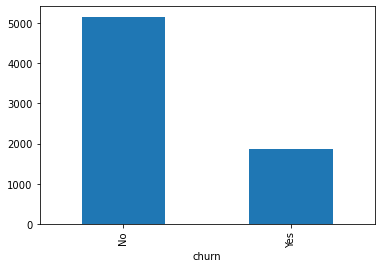

In [18]:
df.churn.value_counts().plot.bar()
plt.xlabel('churn')

In [19]:
train['m2m'].value_counts()

1    2165
0    1772
Name: m2m, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

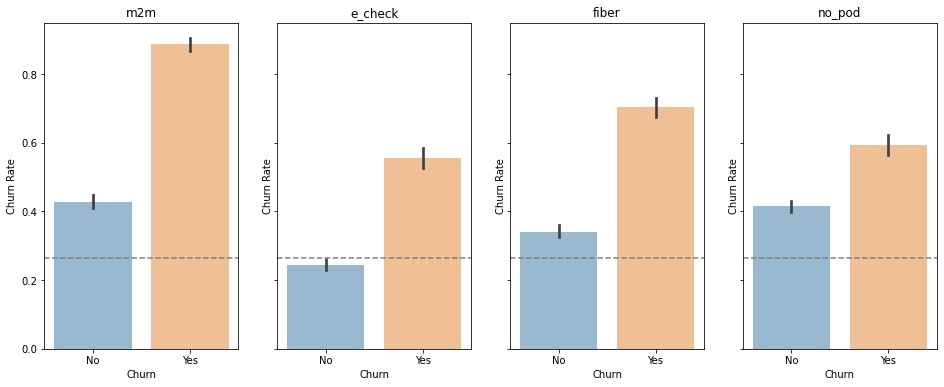

In [21]:
features = ['m2m', 'e_check', 'fiber', 'no_pod']

enumerate(features)

list(enumerate(features))

churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

### Exploring: Churn via p/d status

In [22]:
train.shape, validate.shape, test.shape

((3937, 64), (1688, 64), (1407, 64))

In [23]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,0,0,1
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,1,0,0,1,0,0,0,0,1,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,1,1,0,0,0
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,0,0,1,0,0,0,1


Partner w/ dependents

In [24]:
pd.crosstab(train.contract_type, train.p_w_d)

p_w_d,0,1
contract_type,,
Month-to-month,1818,347
One year,567,248
Two year,566,391


In [25]:
pd.crosstab(train.churn, train.p_w_d)

p_w_d,0,1
churn,,
No,2049,842
Yes,902,144


In [26]:
# % Churn
P_w_D_Churn_Rate = 144/842
print(f'total_pop: 986')
print(f'P_w_D: {P_w_D_Churn_Rate:.2%}')

total_pop: 986
P_w_D: 17.10%


Partner, no dependents

In [27]:
pd.crosstab(train.contract_type, train.p_no_d)

p_no_d,0,1
contract_type,,
Month-to-month,1723,442
One year,604,211
Two year,686,271


In [28]:
pd.crosstab(train.churn, train.p_no_d)

p_no_d,0,1
churn,,
No,2206,685
Yes,807,239


In [29]:
P_no_D_Churn_Rate = 239/685
print(f'total_pop: 924')
print(f'P_no_D: {P_no_D_Churn_Rate:.2%}')

total_pop: 924
P_no_D: 34.89%


Dependents, no partner

In [30]:
pd.crosstab(train.contract_type, train.d_no_p)

d_no_p,0,1
contract_type,,
Month-to-month,2052,113
One year,767,48
Two year,912,45


In [31]:
pd.crosstab(train.churn, train.d_no_p)

d_no_p,0,1
churn,,
No,2727,164
Yes,1004,42


In [32]:
D_no_P_Churn_Rate = 42/164
print(f'total_pop: 206')
print(f'D_no_P: {D_no_P_Churn_Rate:.2%}')

total_pop: 206
D_no_P: 25.61%


Neither partner nor dependents (NONE)

In [33]:
pd.crosstab(train.contract_type, train.no_pod)

no_pod,0,1
contract_type,,
Month-to-month,902,1263
One year,507,308
Two year,707,250


In [34]:
pd.crosstab(train.churn, train.no_pod)

no_pod,0,1
churn,,
No,1691,1200
Yes,425,621


In [35]:
D_no_P_Churn_Rate = 621/1200
print(f'total_pop: 1821')
print(f'neither: {D_no_P_Churn_Rate:.2%}')

total_pop: 1821
neither: 51.75%


### Exploring: M2M Churn by Payment Type

In [36]:
pd.crosstab(train['m2m'], train['a_bank_tr'])

a_bank_tr,0,1
m2m,,
0,1234,538
1,1841,324


In [37]:
pd.crosstab(train['churn'], train['a_bank_tr'])

a_bank_tr,0,1
churn,,
No,2178,713
Yes,897,149


In [38]:
# % Churn
Bank_Tr_Churn_Rate = 149/713
print(f'total_pop: 862')
print(f'Bank_Tr_Churn_Rate: {Bank_Tr_Churn_Rate:.2%}')

total_pop: 862
Bank_Tr_Churn_Rate: 20.90%


In [39]:
pd.crosstab(train['m2m'], train['a_ccard'])

a_ccard,0,1
m2m,,
0,1203,569
1,1839,326


In [40]:
pd.crosstab(train['churn'], train['a_ccard'])

a_ccard,0,1
churn,,
No,2141,750
Yes,901,145


In [41]:
# % Churn
CC_Churn_Rate = 145/750
print(f'total_pop: 895')
print(f'CC_Churn_Rate: {CC_Churn_Rate:.2%}')

total_pop: 895
CC_Churn_Rate: 19.33%


In [42]:
pd.crosstab(train['m2m'], train['e_check'])

e_check,0,1
m2m,,
0,1491,281
1,1157,1008


In [43]:
pd.crosstab(train['churn'], train['e_check'])

e_check,0,1
churn,,
No,2183,708
Yes,465,581


In [44]:
# % Churn
Electronic_Check_Churn_Rate = 581/708
print(f'total_pop: 1289')
print(f'Electronic_Check_Churn_Rate: {Electronic_Check_Churn_Rate:.2%}')

total_pop: 1289
Electronic_Check_Churn_Rate: 82.06%


#### ****Electronic Check Churn Rate is VERY HIGH. Explore further!

In [45]:
pd.crosstab(train['m2m'], train['m_check'])

m_check,0,1
m2m,,
0,1388,384
1,1658,507


In [46]:
pd.crosstab(train['churn'], train['m_check'])

m_check,0,1
churn,,
No,2171,720
Yes,875,171


In [47]:
# % Churn
Mailed_Check_Churn_Rate = 171/720
print(f'total_pop: 891')
print(f'Mailed_Check_Churn_Rate: {Mailed_Check_Churn_Rate:.2%}')

total_pop: 891
Mailed_Check_Churn_Rate: 23.75%


### Exploring: (payment_type) Electronic Check - Churn

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

In [49]:
pd.crosstab(train['e_check'], train['senior_citizen'])

senior_citizen,0,1
e_check,,
0,2337,311
1,965,324


In [50]:
###### ***fiber has high churn. explore further
train.groupby('e_check').internet_service_type.value_counts()

e_check  internet_service_type
0        DSL                      996
         Fiber optic              860
         None                     792
1        Fiber optic              862
         DSL                      352
         None                      75
Name: internet_service_type, dtype: int64

In [51]:
train.groupby('e_check').monthly_charges.mean()

e_check
0    59.340427
1    76.031303
Name: monthly_charges, dtype: float64

In [52]:
# determines that mailed_check is not worth looking at.
# assuming that mailed_check customers are mostly senior_citizens who don't affect churn considerably
train.groupby('m_check').monthly_charges.mean()

m_check
0    70.861556
1    44.100449
Name: monthly_charges, dtype: float64

### Exploring: (internet_service_type) Fiber vs DSL - Churn

In [53]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

In [54]:
###### ***fiber has high churn. explore further
train.groupby('churn').internet_service_type.value_counts()

churn  internet_service_type
No     DSL                      1101
       Fiber optic               987
       None                      803
Yes    Fiber optic               735
       DSL                       247
       None                       64
Name: internet_service_type, dtype: int64

In [55]:
# Average monthly charge for customers with and without Fiber
train.groupby('fiber').monthly_charges.mean()

fiber
0    43.786411
1    91.841405
Name: monthly_charges, dtype: float64

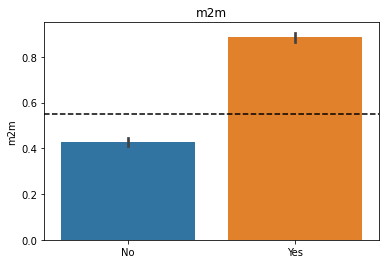

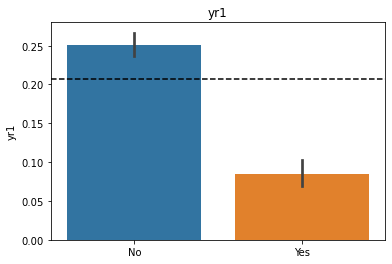

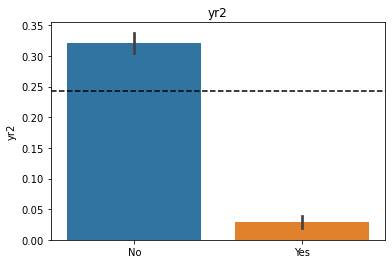

In [56]:
# Barplot expressing churn rate of customers by contract type: Month-to-Month, 1-yr, and 2-yr contracts
variables = ['m2m', 'yr1', 'yr2']

mean = [train['m2m'].mean(), train['yr1'].mean(), train['yr2'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

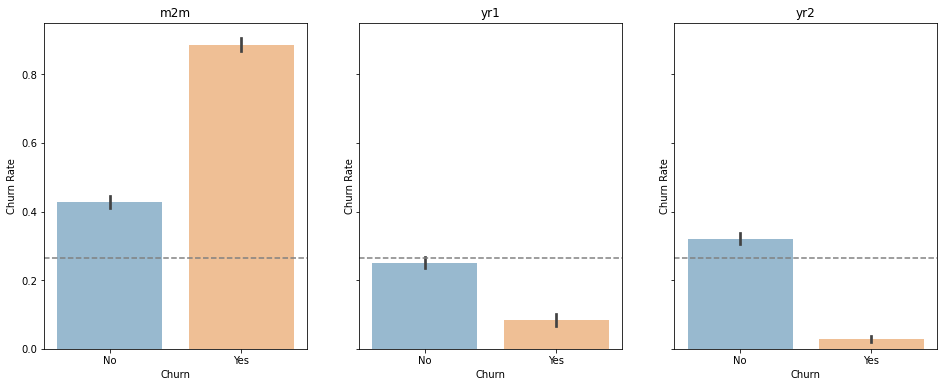

In [57]:
features = ['m2m', 'yr1', 'yr2']

enumerate(features)

list(enumerate(features))

mean = [train['m2m'].mean(), train['yr1'].mean(), train['yr2'].mean()]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

## Plots analyzing our 4 Questions

### Bivariate Analysis

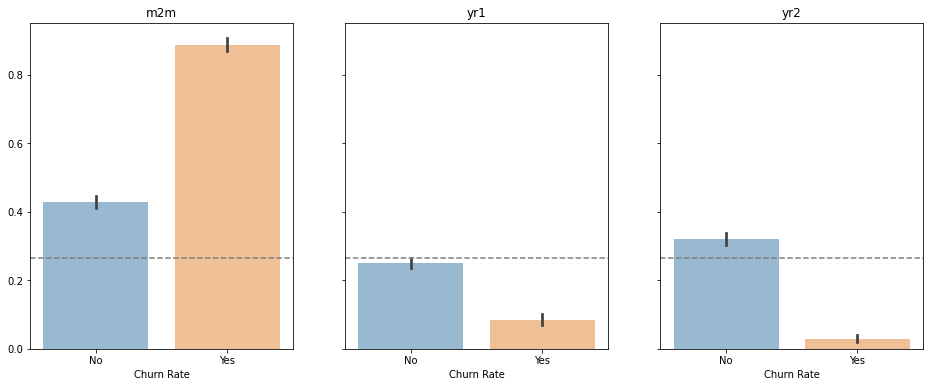

In [59]:
## Q1: M2M customer churn vs. 1-yr and 2-yr customer churn
# Barplot expressing churn rate of customers by contract type: Month-to-Month, 1-yr, and 2-yr contracts

features = ['m2m', 'yr1', 'yr2']

enumerate(features)

list(enumerate(features))

mean = [train['m2m'].mean(), train['yr1'].mean(), train['yr2'].mean()]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

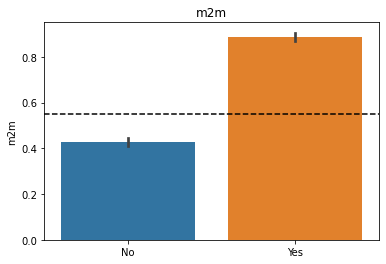

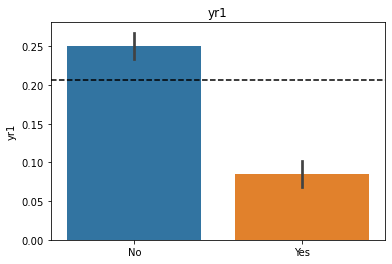

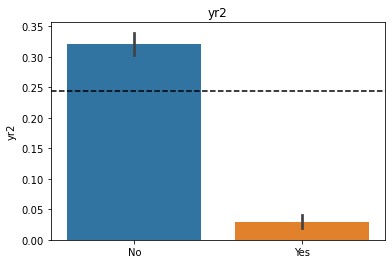

In [60]:
## Q1: M2M customer churn vs. 1-yr and 2-yr customer churn
# Barplot expressing churn rate of customers by contract type: Month-to-Month, 1-yr, and 2-yr contracts
variables = ['m2m', 'yr1', 'yr2']

mean = [train['m2m'].mean(), train['yr1'].mean(), train['yr2'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

Month-to-Month: Churn is very significant for M2M customers. This indicates the need for further exploration and statistical analysis.

1-yr & 2-yr contracts also appear to be very significant.

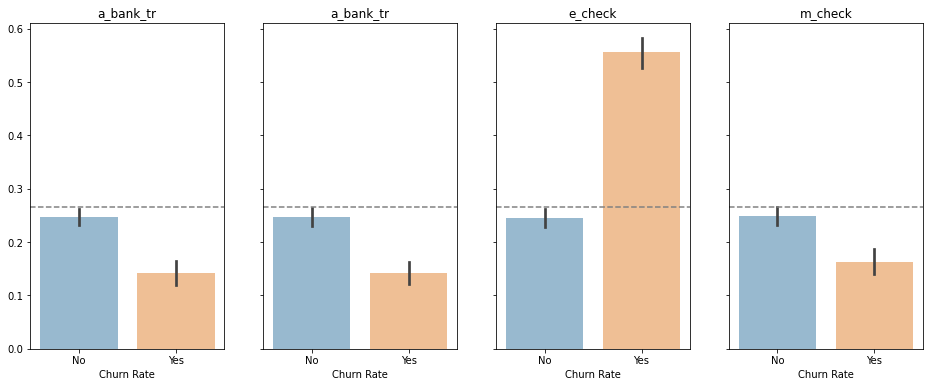

In [61]:
## Q2: Electronic Check vs. other payment types
# Barplot expressing churn rate of customers by payment type: bank transfer, cc, e-check, mailed-check

features = ['a_bank_tr', 'a_bank_tr', 'e_check', 'm_check']

enumerate(features)

list(enumerate(features))

mean = [train['a_bank_tr'].mean(), train['a_bank_tr'].mean(), train['e_check'].mean(), train['m_check'].mean()]
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

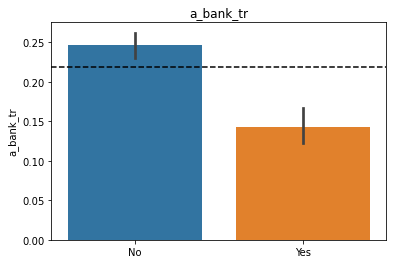

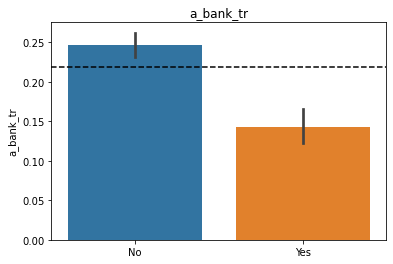

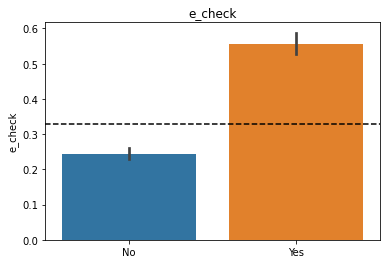

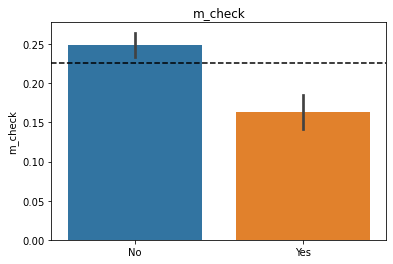

In [62]:
## Q2: Electronic Check vs. other payment types
# Barplot expressing churn rate of customers by payment type: bank transfer, cc, e-check, mailed-check
variables = ['a_bank_tr', 'a_bank_tr', 'e_check', 'm_check']

mean = [train['a_bank_tr'].mean(), train['a_bank_tr'].mean(), train['e_check'].mean(), train['m_check'].mean()]

for x in range(0,4):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

Comparatively, all payment types have low churn except for customers who pay by electronic check. 

I'll investigate electronic check churn further. However, since all 4 payment types are statistically significant, I'll include those in modeling as well. 

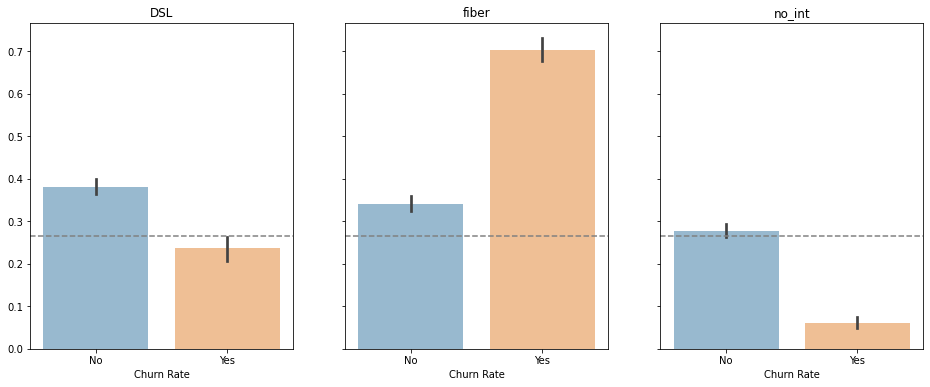

In [63]:
## Q3: Fiber internet vs other internet types
# Barplot expressing churn rate of customers by internet type: Fiber, DSL, or none

features = ['DSL', 'fiber', 'no_int']

enumerate(features)

list(enumerate(features))

mean = [train['DSL'].mean(), train['fiber'].mean(), train['no_int'].mean()]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

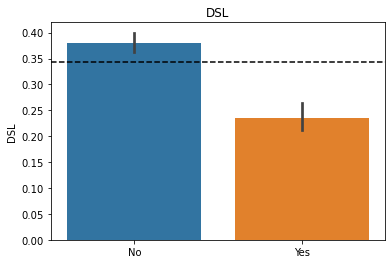

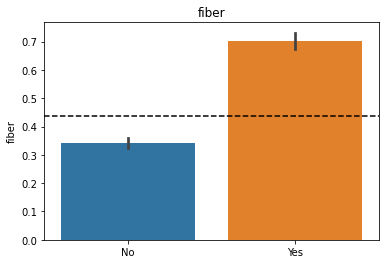

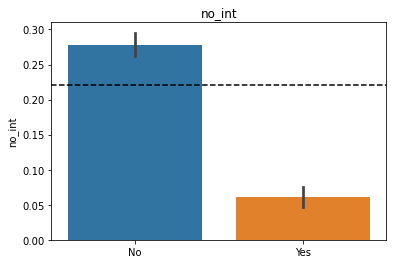

In [64]:
## Q3
# Barplot expressing churn rate of customers by internet type: Fiber, DSL, or none
variables = ['DSL', 'fiber', 'no_int']

mean = [train['DSL'].mean(), train['fiber'].mean(), train['no_int'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [65]:
# Chi-squared test determining whether churn rate for customers with DSL internet is statistically significant
dsl_stat = pd.crosstab(train['DSL'], train.churn_encoded)

print(dsl_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(dsl_stat)

chi2, p

print('--------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
DSL                     
0              1790  799
1              1101  247
--------------------------------------
p: 3.983806924956342e-17
We reject the null hypothesis and this variable is statistically significant


In [66]:
# Chi-squared test determining whether churn rate for customers with Fiber internet is statistically significant
fiber_stat = pd.crosstab(train['fiber'], train.churn_encoded)

print(fiber_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(fiber_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
fiber                   
0              1904  311
1               987  735
--------------------------------------------
p: 2.831419548361709e-90
We reject the null hypothesis and this variable is statistically significant


In [67]:
# Chi-squared test determining whether churn rate for customers with NO internet is statistically significant
no_net_stat = pd.crosstab(train['no_int'], train.churn_encoded)

print(no_net_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_net_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
no_int                  
0              2088  982
1               803   64
--------------------------------------------
p: 2.8653012180661676e-47
We reject the null hypothesis and this variable is statistically significant


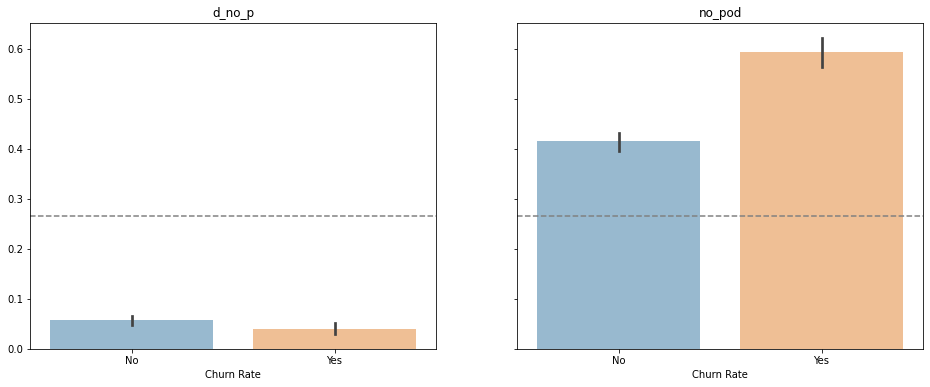

In [68]:
## Q4: Adults with dependents vs. Adults without dependents
# Barplot expressing churn rate of customers by dependent status: Single Adults no dependents vs. Single Adults with dependents

features = ['d_no_p', 'no_pod']

enumerate(features)

list(enumerate(features))

mean = [train['d_no_p'].mean(), train['no_pod'].mean()]
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

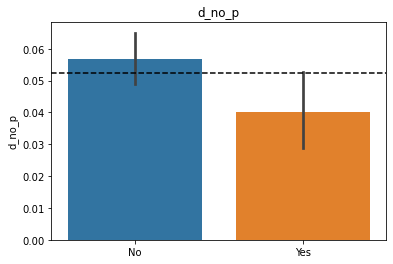

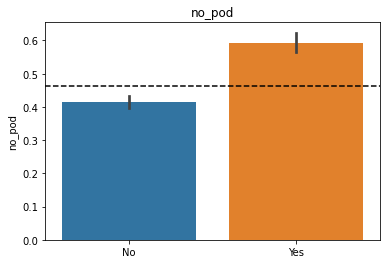

In [69]:
## Q4: Adults with dependents vs. Adults without dependents
# Barplot expressing churn rate of customers by dependent status: Single Adults no dependents vs. Single Adults with dependents
variables = ['d_no_p', 'no_pod']

mean = [train['d_no_p'].mean(), train['no_pod'].mean()]

for x in range(0,2):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

Dependents, no partner: not statistically significant.

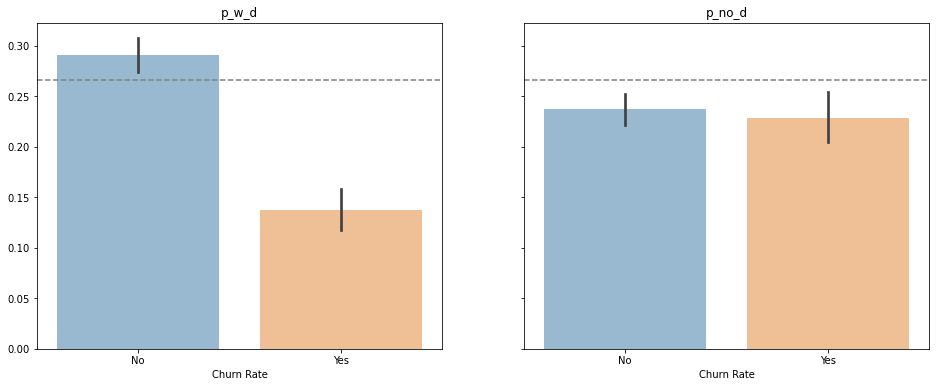

In [70]:
# Barplot expressing churn rate of customers with partner and dependents

features = ['p_w_d', 'p_no_d']

enumerate(features)

list(enumerate(features))

mean = [train['p_w_d'].mean(), train['p_no_d'].mean()]
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

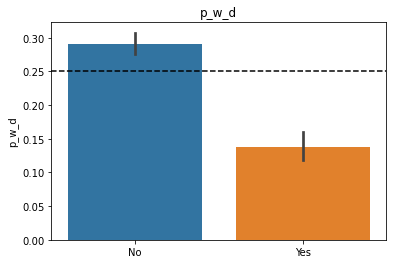

In [71]:
## Q4 (continued): comparing all against partner+dependents
# Barplot expressing churn rate of customers with partner and dependents
variables = ['p_w_d']

mean = [train['p_w_d'].mean()]

for x in range(0,1):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

partner & dependents: seems to have lowest churn of all 4 options. 

Statistically significant and a potential for anecdotal evidence suggesting dependents influence churn significantly.

### Multivariate Analysis: Significant variables and monthly charges

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

sns.swarmplot(x="e_check", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

Electronic Check: swarm shows potential relationship between e-check churn and higher monthly charges

sns.swarmplot(x="m2m", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

M2M: similar to e-check, swarm indicates relationship between m2m churn and higher monthly charges

sns.swarmplot(x="no_pod", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

No partner, no dependents: swarm is rather inconclusive

## Statistical Analysis

### Baseline

In [73]:
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

Baseline prediction is equivalent to the ratio of not churned in our train set over the total number of values.
baseline = 2891/3937

In [74]:
# setting baseline to 0
train['baseline'] = 0

In [75]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod,baseline
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,0,0,1,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,1,0,0,0,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,1,0,0,1,0,1,0,0,0,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,1,0,0,0,1,1,0,0,0,0
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,0,1,0,0,0,1,0


In [76]:
# getting mean of baseline where same as actual churn
(train.churn_encoded == train.baseline).mean()

0.7343154686309372

In [77]:
# Baseline Accuracy:

baseline_accuracy = (train.churn_encoded == train.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.43%


### Confirming statistical significance

In [78]:
# Chi-squared test determining whether Month-to-Month churn rate is statistically significant
m2m_stat = pd.crosstab(train['m2m'], train.churn_encoded)

print(m2m_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(m2m_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
m2m                     
0              1653  119
1              1238  927
We reject the null hypothesis and this variable is statistically significant


In [79]:
e_check_stat = pd.crosstab(train['e_check'], train.churn_encoded)

print(e_check_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(e_check_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
e_check                 
0              2183  465
1               708  581
We reject the null hypothesis and this variable is statistically significant


In [80]:
no_pod_stat = pd.crosstab(train['no_pod'], train.churn_encoded)

print(no_pod_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_pod_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
no_pod                  
0              1691  425
1              1200  621
We reject the null hypothesis and this variable is statistically significant


The above chi2 tests confirm that our selected features are statistically significant.

## Modeling

In [81]:
raw_data = acquire_telco.get_telco_data()
raw_data.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [82]:
df = prepare.prep_telco_data(raw_data)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber,no_int,a_bank_tr,a_ccard,e_check,m_check,p_w_d,p_no_d,d_no_p,no_pod
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,0,0,1,1,0,0,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,1,0,0,0,1,0,0,0,0,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,1,0,0


In [83]:
x_train, y_train, x_validate, y_validate, x_test, y_test = split_telco.telco_split_model(df)

In [84]:
x_train.head()

,m2m,yr1,yr2,a_bank_tr,a_ccard,e_check,m_check,DSL,fiber,no_int,no_pod,p_w_d,d_no_p,tenure
5919,0,1,0,0,1,0,0,1,0,0,1,0,0,58
1915,0,1,0,0,1,0,0,0,1,0,0,0,1,71
5054,1,0,0,0,0,1,0,0,0,1,0,1,0,35
2355,1,0,0,0,0,0,1,0,0,1,0,1,0,1
6279,0,1,0,0,0,0,1,1,0,0,1,0,0,20


### Random Forest

In [85]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(x_train, y_train)
    
    out_of_sample_accuracy = forest.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.762510,0.749408,0.013102
1,3,0.786894,0.769550,0.017344
2,4,0.791974,0.771919,0.020054
3,5,0.801372,0.785545,0.015827
4,6,0.805182,0.784953,0.020229
5,7,0.812294,0.777251,0.035042
6,8,0.822962,0.772512,0.050450
7,9,0.829058,0.768957,0.060100
8,10,0.844806,0.763626,0.081180
9,11,0.860300,0.755332,0.104968


### KNN

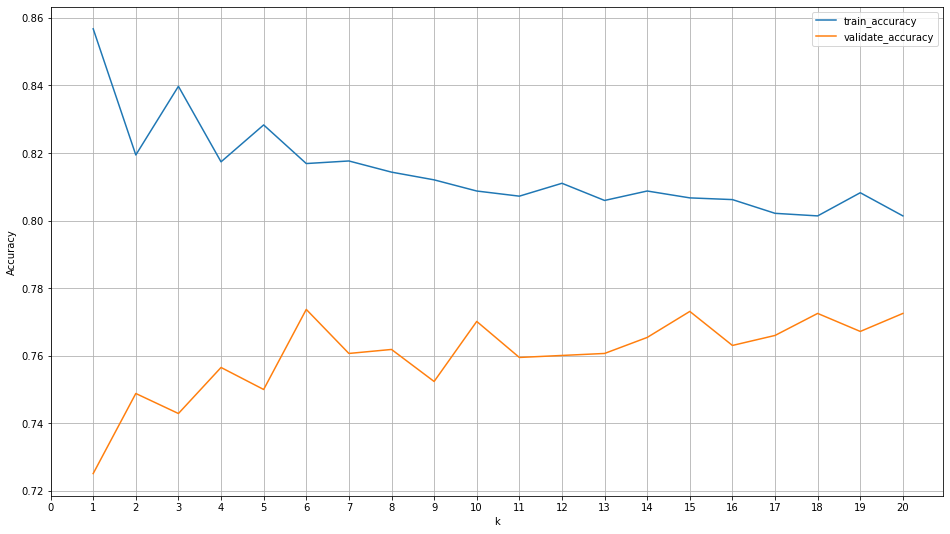

In [86]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(x_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(x_train, y_train)
    validate_accuracy = knn.score(x_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)


# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [87]:
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,k,train_accuracy,validate_accuracy,difference
0,1,0.856744,0.725118,0.131625
1,2,0.819406,0.748815,0.070590
2,3,0.839726,0.742891,0.096835
3,4,0.817374,0.756517,0.060857
4,5,0.828296,0.750000,0.078296
5,6,0.816866,0.773697,0.043169
6,7,0.817628,0.760664,0.056964
7,8,0.814326,0.761848,0.052477
8,9,0.812040,0.752370,0.059670
9,10,0.808738,0.770142,0.038595


### Logistic Regression

In [88]:
model = sklearn.linear_model.LogisticRegression(C=1)
model.fit(x_train, y_train)
accuracy = model.score(x_validate, y_validate)
coefs = dict(zip(x_train.columns, model.coef_[0]))

In [89]:
# Looping through different C values and look at resulting model coefficients

# creating a function for C
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(x_train, y_train)
    accuracy = model.score(x_validate, y_validate)
    coefs = dict(zip(x_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# looping through different C values
models = [evaluate_model(c) for c in [.001, .01, .1, 1, 10, 100, 1000]]


(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,m2m,yr1,yr2,a_bank_tr,a_ccard,e_check,m_check,DSL,fiber,no_int,no_pod,p_w_d,d_no_p,tenure
C,accuracy,,,,,,,,,,,,,,
0.001000,0.768000,0.117,-0.050,-0.067,-0.015,-0.021,0.125,-0.089,-0.078,0.216,-0.138,0.018,-0.043,-0.017,-0.036
0.010000,0.778000,0.428,-0.148,-0.280,-0.036,-0.064,0.315,-0.216,-0.190,0.723,-0.533,0.021,-0.140,-0.071,-0.033
0.100000,0.775000,0.691,-0.128,-0.578,-0.046,-0.095,0.314,-0.187,-0.134,1.038,-0.919,-0.031,-0.227,-0.161,-0.031
1.000000,0.772000,0.613,-0.245,-0.838,-0.162,-0.214,0.185,-0.279,-0.260,0.954,-1.164,-0.060,-0.267,-0.244,-0.031
10.000000,0.771000,0.608,-0.251,-0.870,-0.176,-0.227,0.175,-0.285,-0.267,0.946,-1.192,-0.063,-0.268,-0.261,-0.031
100.000000,0.771000,0.609,-0.252,-0.873,-0.176,-0.227,0.173,-0.286,-0.267,0.946,-1.195,-0.063,-0.268,-0.265,-0.031
1000.000000,0.771000,0.608,-0.252,-0.872,-0.176,-0.228,0.173,-0.286,-0.268,0.946,-1.195,-0.063,-0.268,-0.265,-0.031


C value of 0.01 seems to provide most accurate results.

## Addl. exploration: 

<AxesSubplot:>

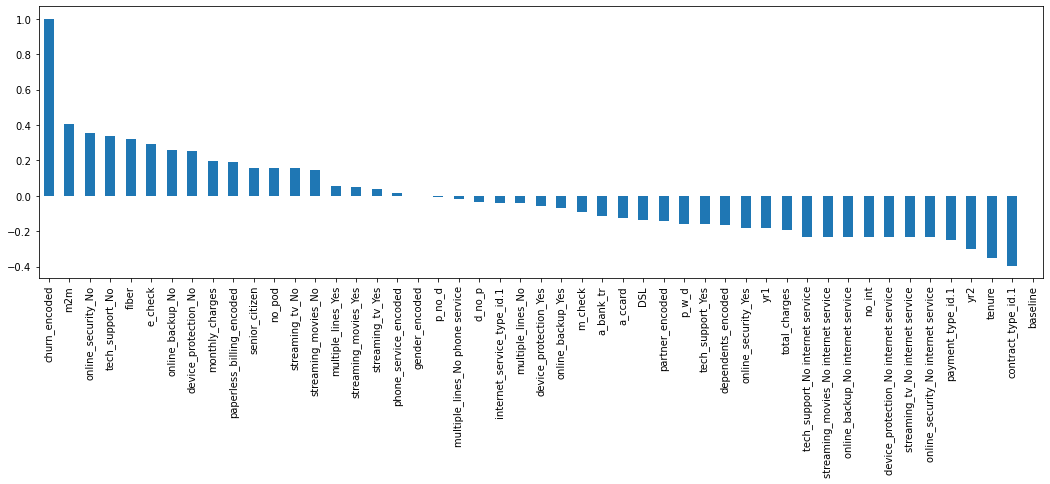

In [90]:
train.corr().churn_encoded.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))